In [ ]:
import numpy as np
from astropy import constants as c
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import math as mth
import pandas as pd
from PP import pebble_predictor
#from allplanets import all_planets

In [ ]:
# some useful constants in cgs
year = 365.25*24*3600   #in seconds
au = c.au.cgs.value
MS = c.M_sun.cgs.value      #mass of the sun in cgs
ME = c.M_earth.cgs.value    #mass of the earth in cgs
k_b = c.k_B.cgs.value       #boltzmann const
m_p = c.m_p.cgs.value       #mass of proton
Grav = c.G.cgs.value        #gravitational const
au = c.au.cgs.value     

ZS=0.012                    #metallicity of the sun
RS=6957.e10                #Radius of sun in cm

Nr = 1000 # number of grid points      
rhop = 1.25 # internal density of dust grains 
Rout = 1000.*au
    

In [ ]:
df=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Documents\\IISERM\\INTERNSHIPS\\Joanna Drazkowska\\with_errors.csv"
               ,index_col=False)

df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')
col_names=df2.columns.values.tolist()
for i in col_names:
    df2.dropna(subset=[i], inplace=True)

print(len(df2.index))

798


<ipython-input-3-b99a9475c200>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=[i], inplace=True)


In [ ]:
print("au=",au)
print("MS=",MS)
print("ME=",ME)
print("Kb=",k_b)
print("proton mass=",m_p)
print("grav const=",Grav)

au= 14959787070000.0
MS= 1.988409870698051e+33
ME= 5.972167867791379e+27
Kb= 1.380649e-16
proton mass= 1.67262192369e-24
grav const= 6.674299999999999e-08


In [ ]:
MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values

In [ ]:
print(len(location_array))

798


In [ ]:
year = 365.25*24*3600   #in seconds
Nt = 1000   # how many points on the time grid?
endtime = 1.e7*year
timegrid = np.logspace(np.log10(year),np.log10(endtime),Nt) 
timegrid[0]

31557600.000000007

In [ ]:
I=np.load("isolp_full.npy")
print(I)

[[87.3433584  91.10275689 91.60401003 91.85463659 91.60401003 91.35338346
  91.47869674 91.35338346 91.22807018 91.10275689]
 [25.31328321 74.81203008 85.96491228 90.22556391 90.72681704 90.85213033
  90.97744361 91.10275689 90.72681704 90.60150376]
 [ 0.          2.63157895 21.17794486 44.36090226 61.02756892 72.93233083
  78.07017544 82.0802005  84.71177945 86.96741855]
 [ 0.          0.          0.          0.          0.50125313  1.87969925
   4.76190476  9.02255639 17.1679198  25.68922306]]


In [ ]:
#isol=np.load("isol.npy")
#print(isol[1])

isol=[[56.30841121,80.72429907,86.3317757,89.25233645,91.23831776,92.75700935,94.04205607,95.44392523,95.56074766,95.91121495],
   [0,4.789719626,49.64953271,73.94859813,85.74766355,91.12149533,94.04205607,95.44392523,95.56074766,95.91121495],
   [0,0,0,0,0.7009345794,3.271028037,9.462616822,19.97663551,41.47196262,56.42523364],
   [0,0,0,0,0,0,0,0,0,0]
   ]

A=[10**-5,10**-4,10**-3,10**-2]                            #alpha values
V=np.linspace(100,1000,10)            #vfrag values
q=10                                #number of planets being considered from the list

In [ ]:
AA,VV = np.meshgrid(A,V)

In [ ]:
ALPHA=[]
VFRAG=[]
ISOL=[]

for i in range(len(A)):
    for j in range(len(V)):
            ALPHA.append(A[i])
            VFRAG.append(V[j])
            ISOL.append(isol[i][j])


#print(ALPHA)
#print(VFRAG)
#print(ISOL)


In [ ]:
print(np.shape(I))

(4, 10)


In [ ]:
from scipy.ndimage import gaussian_filter
import scipy.ndimage

In [ ]:
print(np.shape(isol))

(4, 10)


In [ ]:
I=np.load("isolp_full.npy")
Final=np.load("Final_full.npy")
isol=np.load("isol_full.npy")
print(isol)
#Final
I

[[697. 727. 731. 733. 731. 729. 730. 729. 728. 727.]
 [202. 597. 686. 720. 724. 725. 726. 727. 724. 723.]
 [  0.  21. 169. 354. 487. 582. 623. 655. 676. 694.]
 [  0.   0.   0.   0.   4.  15.  38.  72. 137. 205.]]


array([[87.3433584 , 91.10275689, 91.60401003, 91.85463659, 91.60401003,
        91.35338346, 91.47869674, 91.35338346, 91.22807018, 91.10275689],
       [25.31328321, 74.81203008, 85.96491228, 90.22556391, 90.72681704,
        90.85213033, 90.97744361, 91.10275689, 90.72681704, 90.60150376],
       [ 0.        ,  2.63157895, 21.17794486, 44.36090226, 61.02756892,
        72.93233083, 78.07017544, 82.0802005 , 84.71177945, 86.96741855],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.50125313,
         1.87969925,  4.76190476,  9.02255639, 17.1679198 , 25.68922306]])

In [ ]:
print(757/789)

0.9594423320659062


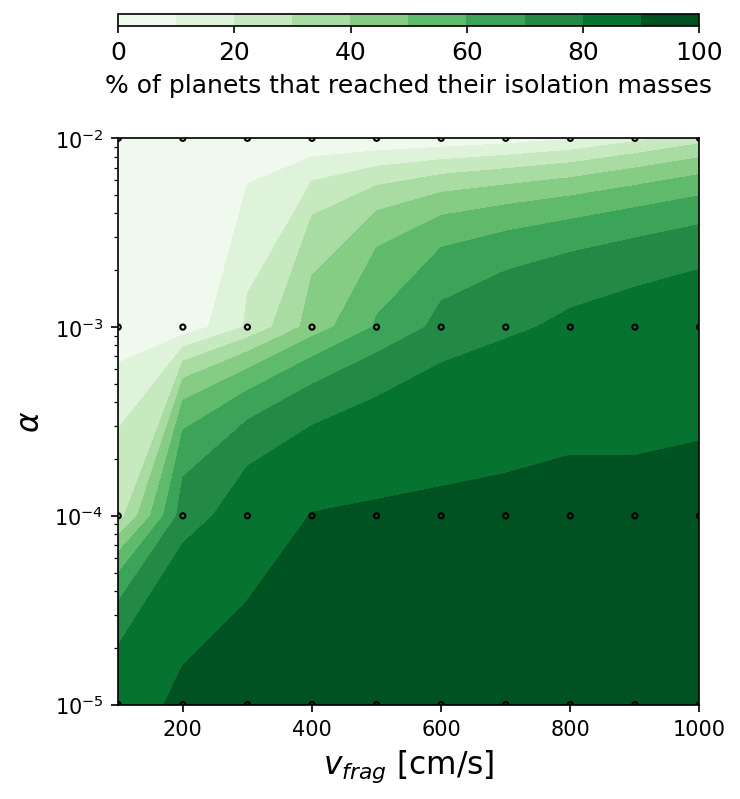

In [ ]:
#COLOUR MAP PRINTING
f,ax = plt.subplots(1,1,figsize=(5,5), dpi=150, sharex=True, sharey=True)
plt.rcParams['font.size'] = '12'

#ax.set_aspect('equal')
ax.set_ylabel(r'$\alpha$', fontsize=15)
ax.set_xlim(100,1000)
ax.set_ylim(10**-5,10**-2)
ax.set_yscale('log')
ax.set_xlabel(r'$v_{frag}$ [cm/s]', fontsize=15)
levelsp = np.arange(0,110,10)

cc = ax.contourf(V,A, I, cmap='Greens',levels=levelsp)

pos = ax.get_position()
cax = f.add_axes([pos.x0,pos.y1+.15,pos.width,pos.width/50])
cb = plt.colorbar(mappable=cc, cax=cax, orientation='horizontal',label='% of planets that reached their isolation masses')
#cp = ax.contour(V,A,isol,levels=levelsp,colors='k')
ax.scatter(VFRAG,ALPHA,s=6,facecolors='none', edgecolors='black')
#ax.scatter(VFRAG,ALPHA,c=isol,s=5)
plt.savefig('main.jpg')

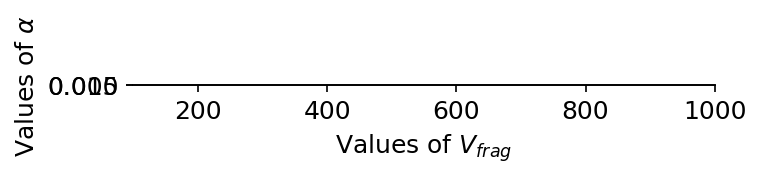

In [ ]:
#COLOUR MAP PRINTING
f,ax = plt.subplots(1,1,figsize=(5,5), dpi=150)

#ax.set_aspect('equal')
ax.set_ylabel(r'Values of $\alpha$')
#ax.set_xlim(100,1000)
#ax.set_ylim(10**-5,10**-2)
#ax.set_yscale('log')
ax.set_xlabel(r'Values of $V_{frag}$')
#levelsp = np.arange(0,110,10)

ax.imshow(isol, origin='lower', aspect=5, extent=[100,1000,10**-5,10**-2], cmap='Greens', interpolation='gaussian')
ax.scatter(VFRAG,ALPHA,s=6,facecolors='none', edgecolors='black')
#cp = ax.contour(V,A,isol,levels=levelsp,colors='k')
#ax.colorbar()
#ax.axis(aspect='image')

In [ ]:
df=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Documents\\IISERM\\INTERNSHIPS\\Joanna Drazkowska\\with_errors.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')

MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values
pl_mass=df2["planet mass (earth mass)"].values.tolist()
pl_rad=df2["planet radius (earth radius)"].values.tolist()

Text(0, 0.5, 'Frequency of planets')

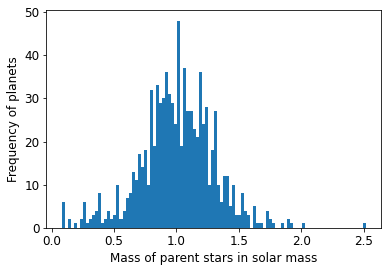

In [ ]:
plt.hist(MStar_list,bins=100)
plt.xlabel("Mass of parent stars in solar mass")
plt.ylabel("Frequency of planets")

Text(0, 0.5, 'Frequency of planets')

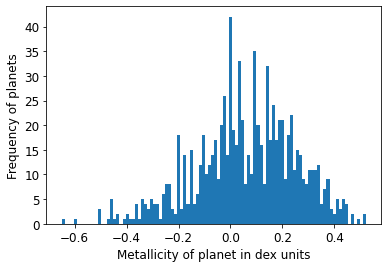

In [ ]:
plt.hist(Metallicity,bins=100)
plt.xlabel("Metallicity of planet in dex units")
plt.ylabel("Frequency of planets")

Text(0, 0.5, 'Frequency of planets')

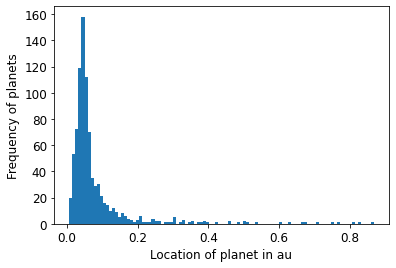

In [ ]:
plt.hist(location_array,bins=100)
plt.xlabel("Location of planet in au")
plt.ylabel("Frequency of planets")

Text(0.5, 0, 'Radius [$R_\\oplus$]')

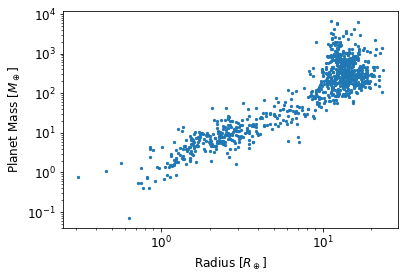

In [ ]:
plt.scatter(pl_rad,pl_mass,s=5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Planet Mass [$M_\oplus$]")
plt.xlabel("Radius [$R_\oplus$]")

Text(0.5, 0, 'semi maj axis [au]')

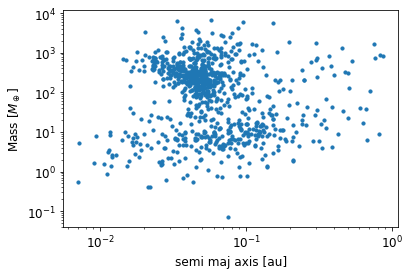

In [ ]:
plt.scatter(location_array,pl_mass,s=10)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Mass [$M_\oplus$]")
plt.xlabel("semi maj axis [au]")

Text(0.5, 0, 'semi maj axis [au]')

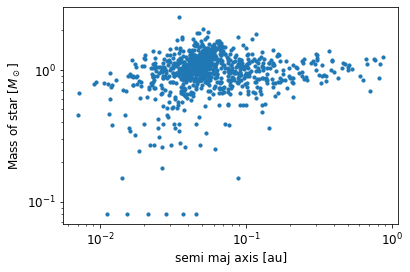

In [ ]:
plt.scatter(location_array,MStar_list,s=10)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Mass of star [$M_\odot$]")
plt.xlabel("semi maj axis [au]")

Text(0.5, 0, 'semi maj axis [au]')

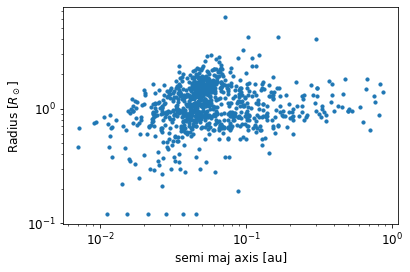

In [ ]:
plt.scatter(location_array,Rstar_array,s=10)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Radius [$R_\odot$]")
plt.xlabel("semi maj axis [au]")

In [ ]:
year = 365.25*24*3600   #in seconds
Nt = 1000   # how many points on the time grid?
endtime = 1.e7*year
timegrid = np.logspace(np.log10(year),np.log10(endtime),Nt)     #starts from 1 year and ends at endtime defined above, goes for Nt number of points

it2 = timegrid.searchsorted((1) * year)     #time at which the core should start accreting pebble
it2

0

In [ ]:
notisol=np.load("flux_notisol.npy")
print(np.shape(notisol))
eps=np.load("eps.npy")
ir=np.load("ir.npy")
stokes=np.load("stokes.npy")
print(ir)
Y=notisol[:,int(ir)]
print(np.shape(Y))


(1000, 1000)
185
(1000,)


In [ ]:
isol=np.load("flux_isol.npy")
ir2=np.load("ir2.npy")
eps2=np.load("eps2.npy")
stokes2=np.load("stokes2.npy")
print(np.shape(isol))
print(ir2)
Y2=isol[:,int(ir2)]
print(np.shape(Y2))

(1000, 1000)
185
(1000,)


In [ ]:
print(Metallicity[int(ir)])

0.07


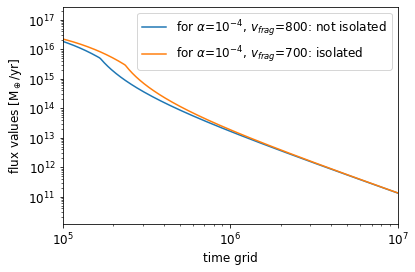

In [ ]:
plt.xscale("log")
plt.yscale("log")
#plt.ylim(10**16,2*10**17)
plt.xlim(10**5,10**7)
plt.plot(timegrid/year, Y, label=r"for $\alpha$=$10^{-4}$, $v_{frag}$=800: not isolated")
plt.plot(timegrid/year, Y2, label=r"for $\alpha$=$10^{-4}$, $v_{frag}$=700: isolated")
plt.xlabel("time grid")
plt.ylabel("flux values [M$_\oplus$/yr]")
plt.legend()
#plt.title("sae")

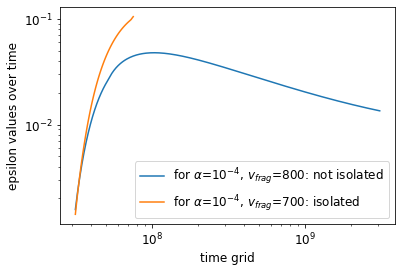

In [ ]:
plt.xscale("log")
plt.yscale("log")
plt.plot(timegrid[0:len(eps)], eps, label=r"for $\alpha$=$10^{-4}$, $v_{frag}$=800: not isolated")
plt.plot(timegrid[0:len(eps2)], eps2, label=r"for $\alpha$=$10^{-4}$, $v_{frag}$=700: isolated")
plt.xlabel("time grid")
plt.ylabel("epsilon values over time")
plt.legend()
#plt.title("sae")

In [ ]:
np.shape(MStar_list)

(865,)

In [ ]:
datax,datay=np.meshgrid(Metallicity, MStar_list,sparse=True)

print(np.shape(datax),np.shape(datay))
data=np.vstack((datax, datay.T))


(1, 865) (865, 1)


In [ ]:
import seaborn as sns

In [ ]:
data

array([[-0.01 ,  0.03 , -0.18 , ..., -0.255,  0.253,  0.34 ],
       [ 0.45 ,  0.66 ,  0.78 , ...,  0.86 ,  1.11 ,  1.24 ]])

In [ ]:
data1=sns.load_dataset("penguins")
print(data1)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

In [ ]:
df2

,Planet Name,disc_year,semi major axis (au),pl_orbsmaxerr1,pl_orbsmaxerr2,planet radius (earth radius),pl_radeerr1,pl_radeerr2,planet mass (earth mass),pl_masseerr1,...,radius of star (solar radius),st_raderr1,st_raderr2,mass of star (solar masses),st_masserr1,st_masserr2,metallicity = log(k)*metallicity of sun,st_meterr1,st_meterr2,pl_pubdate
0,GJ 367 b,2021,0.00710,0.00020,-0.00020,0.718,0.054,-0.054,0.54600,0.07800,...,0.46,0.01,-0.01,0.45,0.01,-0.01,-0.010,0.120,-0.120,2021-12
1,K2-141 b,2018,0.00716,0.00055,-0.00065,1.540,0.100,-0.090,5.31000,0.46000,...,0.67,0.04,-0.04,0.66,0.02,-0.02,0.030,0.100,-0.100,2018-05
3,Kepler-78 b,2013,0.00901,0.00012,-0.00019,1.201,0.028,-0.028,1.68000,0.27000,...,0.75,0.01,-0.01,0.78,0.03,-0.05,-0.180,0.080,-0.080,2023-04
4,K2-131 b,2017,0.00936,0.00014,-0.00014,1.690,0.085,-0.058,7.90000,1.30000,...,0.76,0.01,-0.01,0.80,0.03,-0.03,-0.040,0.070,-0.070,2023-04
5,TOI-561 b,2020,0.01055,0.00008,-0.00008,1.423,0.066,-0.066,1.59000,0.36000,...,0.85,0.01,-0.01,0.79,0.02,-0.02,-0.330,0.100,-0.050,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Kepler-1514 b,2016,0.75300,0.01300,-0.01400,12.420,0.258,-0.258,1678.14240,69.92260,...,1.29,0.03,-0.03,1.20,0.07,-0.06,0.119,0.080,-0.075,2021-03
1353,TOI-4562 b,2023,0.76800,0.00500,-0.00500,12.530,0.150,-0.150,732.00000,152.00000,...,1.15,0.05,-0.05,1.19,0.06,-0.06,0.080,0.060,-0.060,2022-08
1354,Kepler-22 b,2011,0.81200,0.01100,-0.01300,2.100,0.120,-0.120,9.10000,NaN,...,0.87,0.01,-0.01,0.86,0.05,-0.04,-0.255,0.065,-0.065,2023-04
1355,TOI-2180 b,2022,0.82800,0.01200,-0.01200,11.321,0.247,-0.213,875.61726,27.65107,...,1.64,0.03,-0.03,1.11,0.05,-0.05,0.253,0.057,-0.057,2022-02


In [ ]:
Metallicity_converted=[]
for i in Metallicity:
    Metallicity_converted.append((10**i)*0.012)

print(max(Metallicity_converted))

0.03991914639528054


In [ ]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

In [ ]:
df2

,Planet Name,disc_year,semi major axis (au),pl_orbsmaxerr1,pl_orbsmaxerr2,planet radius (earth radius),pl_radeerr1,pl_radeerr2,planet mass (earth mass),pl_masseerr1,...,radius of star (solar radius),st_raderr1,st_raderr2,mass of star (solar masses),st_masserr1,st_masserr2,metallicity = log(k)*metallicity of sun,st_meterr1,st_meterr2,pl_pubdate
0,GJ 367 b,2021,0.00710,0.00020,-0.00020,0.718,0.054,-0.054,0.54600,0.07800,...,0.46,0.01,-0.01,0.45,0.01,-0.01,-0.010,0.120,-0.120,2021-12
1,K2-141 b,2018,0.00716,0.00055,-0.00065,1.540,0.100,-0.090,5.31000,0.46000,...,0.67,0.04,-0.04,0.66,0.02,-0.02,0.030,0.100,-0.100,2018-05
3,Kepler-78 b,2013,0.00901,0.00012,-0.00019,1.201,0.028,-0.028,1.68000,0.27000,...,0.75,0.01,-0.01,0.78,0.03,-0.05,-0.180,0.080,-0.080,2023-04
4,K2-131 b,2017,0.00936,0.00014,-0.00014,1.690,0.085,-0.058,7.90000,1.30000,...,0.76,0.01,-0.01,0.80,0.03,-0.03,-0.040,0.070,-0.070,2023-04
5,TOI-561 b,2020,0.01055,0.00008,-0.00008,1.423,0.066,-0.066,1.59000,0.36000,...,0.85,0.01,-0.01,0.79,0.02,-0.02,-0.330,0.100,-0.050,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Kepler-1514 b,2016,0.75300,0.01300,-0.01400,12.420,0.258,-0.258,1678.14240,69.92260,...,1.29,0.03,-0.03,1.20,0.07,-0.06,0.119,0.080,-0.075,2021-03
1353,TOI-4562 b,2023,0.76800,0.00500,-0.00500,12.530,0.150,-0.150,732.00000,152.00000,...,1.15,0.05,-0.05,1.19,0.06,-0.06,0.080,0.060,-0.060,2022-08
1354,Kepler-22 b,2011,0.81200,0.01100,-0.01300,2.100,0.120,-0.120,9.10000,NaN,...,0.87,0.01,-0.01,0.86,0.05,-0.04,-0.255,0.065,-0.065,2023-04
1355,TOI-2180 b,2022,0.82800,0.01200,-0.01200,11.321,0.247,-0.213,875.61726,27.65107,...,1.64,0.03,-0.03,1.11,0.05,-0.05,0.253,0.057,-0.057,2022-02


AttributeError: 'PathCollection' object has no property 'marginal_ticks'

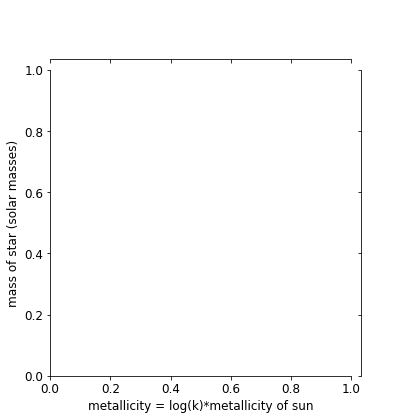

In [ ]:
g=sns.jointplot(data=df2, x="metallicity = log(k)*metallicity of sun", y="mass of star (solar masses)", color="purple", s=8, marginal_ticks=True )
#sns.scatterplot(data=df2, x="metallicity = log(k)*metallicity of sun", y="mass of star (solar masses)")

plt.ylabel(r"Mass of planets [$M_\oplus$]")
plt.xlabel(r"Position of planets (relative to their parent stars) [au]")
#plt.yscale("log")
#plt.xscale("log")


In [ ]:
K=df2.loc[:,"planet mass (earth mass)"].tolist()
c=0
for i in K:
    if i>140 and i<200:
        c+=1
print(c)


72


In [ ]:
df3=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Documents\\IISERM\\INTERNSHIPS\\Joanna Drazkowska\\with_errors.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df4 = df.drop_duplicates(subset=["Planet Name"], keep='first')

MStar_list=df4["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df4["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df4["radius of star (solar radius)"].values.tolist()
Metallicity=df4["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values



In [ ]:
import pandas as pd

df=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Documents\\IISERM\\INTERNSHIPS\\Joanna Drazkowska\\with_errors.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')
print(len(df2))


865


In [ ]:
df=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Documents\\IISERM\\INTERNSHIPS\\Joanna Drazkowska\\with_errors.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')

MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values

In [ ]:
I

array([[86.84210526, 91.10275689, 91.60401003, 91.97994987, 91.60401003,
        91.47869674, 91.47869674, 91.35338346, 91.22807018, 91.22807018],
       [25.56390977, 74.93734336, 85.839599  , 90.22556391, 90.72681704,
        90.85213033, 90.97744361, 91.10275689, 90.72681704, 90.47619048],
       [ 0.        ,  2.63157895, 21.30325815, 44.23558897, 60.77694236,
        72.80701754, 77.81954887, 82.20551378, 84.3358396 , 86.84210526],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.50125313,
         2.13032581,  4.63659148,  9.39849624, 18.29573935, 25.93984962]])

In [ ]:
df2

,Planet Name,disc_year,semi major axis (au),pl_orbsmaxerr1,pl_orbsmaxerr2,planet radius (earth radius),pl_radeerr1,pl_radeerr2,planet mass (earth mass),pl_masseerr1,...,radius of star (solar radius),st_raderr1,st_raderr2,mass of star (solar masses),st_masserr1,st_masserr2,metallicity = log(k)*metallicity of sun,st_meterr1,st_meterr2,pl_pubdate
0,GJ 367 b,2021,0.00710,0.00020,-0.00020,0.718,0.054,-0.054,0.54600,0.07800,...,0.46,0.01,-0.01,0.45,0.01,-0.01,-0.010,0.120,-0.120,2021-12
1,K2-141 b,2018,0.00716,0.00055,-0.00065,1.540,0.100,-0.090,5.31000,0.46000,...,0.67,0.04,-0.04,0.66,0.02,-0.02,0.030,0.100,-0.100,2018-05
3,Kepler-78 b,2013,0.00901,0.00012,-0.00019,1.201,0.028,-0.028,1.68000,0.27000,...,0.75,0.01,-0.01,0.78,0.03,-0.05,-0.180,0.080,-0.080,2023-04
4,K2-131 b,2017,0.00936,0.00014,-0.00014,1.690,0.085,-0.058,7.90000,1.30000,...,0.76,0.01,-0.01,0.80,0.03,-0.03,-0.040,0.070,-0.070,2023-04
5,TOI-561 b,2020,0.01055,0.00008,-0.00008,1.423,0.066,-0.066,1.59000,0.36000,...,0.85,0.01,-0.01,0.79,0.02,-0.02,-0.330,0.100,-0.050,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Kepler-1514 b,2016,0.75300,0.01300,-0.01400,12.420,0.258,-0.258,1678.14240,69.92260,...,1.29,0.03,-0.03,1.20,0.07,-0.06,0.119,0.080,-0.075,2021-03
1353,TOI-4562 b,2023,0.76800,0.00500,-0.00500,12.530,0.150,-0.150,732.00000,152.00000,...,1.15,0.05,-0.05,1.19,0.06,-0.06,0.080,0.060,-0.060,2022-08
1354,Kepler-22 b,2011,0.81200,0.01100,-0.01300,2.100,0.120,-0.120,9.10000,NaN,...,0.87,0.01,-0.01,0.86,0.05,-0.04,-0.255,0.065,-0.065,2023-04
1355,TOI-2180 b,2022,0.82800,0.01200,-0.01200,11.321,0.247,-0.213,875.61726,27.65107,...,1.64,0.03,-0.03,1.11,0.05,-0.05,0.253,0.057,-0.057,2022-02


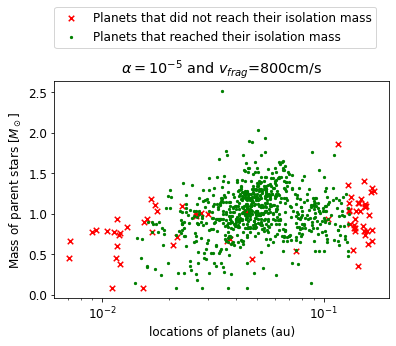

In [ ]:
final=np.load("Final_full.npy")
pos=[]
pos2=[]

locations=[]
locerr1=[]
locerr2=[]
massofstar=[]
Metallicityofstar=[]
radiusofstar=[]

locations2=[]
massofstar2=[]
Metallicityofstar2=[]
radiusofstar2=[]

lala=final[0][7]
#print(lala)
for i in range(798):
    if lala[i]==0:
        pos.append(i)
    elif lala[i]==1:
        pos2.append(i)

#print(lala)
for i in pos:
    locations.append(location_array[i])

    massofstar.append(MStar_list[i])
    Metallicityofstar.append(Metallicity[i])
    radiusofstar.append(Rstar_array[i])
    

for i in pos2:
    locations2.append(location_array[i])
    massofstar2.append(MStar_list[i])
    Metallicityofstar2.append(Metallicity[i])
    radiusofstar2.append(Rstar_array[i])

#print(len(pos2))
#print(len(pos))
plt.scatter(locations,massofstar,s=30,color="red",label="Planets that did not reach their isolation mass" , marker='x')
plt.scatter(locations2,massofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)

plt.xlabel("locations of planets (au)")
plt.ylabel(r"Mass of parent stars [$M_\odot$]")
plt.legend(loc=(0,1.15))
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$=800cm/s")
plt.xscale("log")



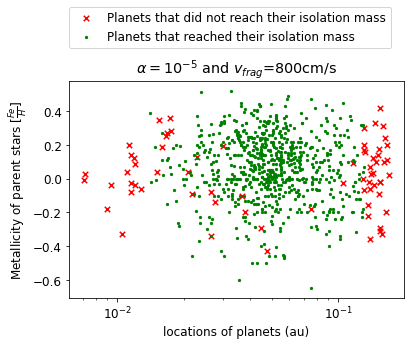

In [ ]:
plt.scatter(locations,Metallicityofstar,s=30,color="red",label="Planets that did not reach their isolation mass", marker='x')
plt.scatter(locations2,Metallicityofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel("locations of planets (au)")
plt.ylabel(r"Metallicity of parent stars [$\frac{Fe}{H}$]")
plt.legend(loc=(0,1.15))
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$=800cm/s")
plt.xscale("log")

Text(0.5, 1.0, '$\\alpha = 10^{-5}$ and $v_{frag}$=800cm/s')

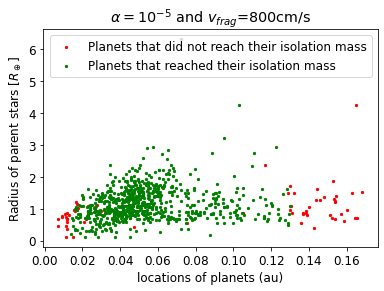

In [ ]:
plt.scatter(locations,radiusofstar,s=5,color="red",label="Planets that did not reach their isolation mass")
plt.scatter(locations2,radiusofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel("locations of planets (au)")
plt.ylabel(r"Radius of parent stars [$R_\oplus$]")
plt.legend()
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$=800cm/s")

Text(0.5, 1.0, '$\\alpha = 10^{-5}$ and $v_{frag}$=1000cm/s')

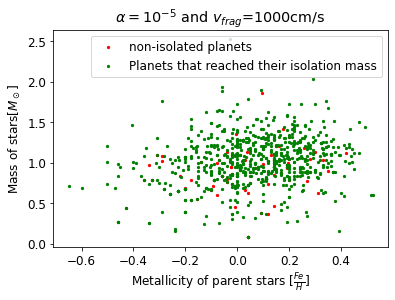

In [ ]:
plt.scatter(Metallicityofstar,massofstar,s=5,color="red",label="non-isolated planets")
plt.scatter(Metallicityofstar2,massofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel(r"Metallicity of parent stars [$\frac{Fe}{H}$]")
plt.ylabel(r"Mass of stars[$M_\odot$]")
plt.legend()
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$=1000cm/s")

In [ ]:
df2

,Planet Name,disc_year,semi major axis (au),pl_orbsmaxerr1,pl_orbsmaxerr2,planet radius (earth radius),pl_radeerr1,pl_radeerr2,planet mass (earth mass),pl_masseerr1,...,radius of star (solar radius),st_raderr1,st_raderr2,mass of star (solar masses),st_masserr1,st_masserr2,metallicity = log(k)*metallicity of sun,st_meterr1,st_meterr2,pl_pubdate
0,GJ 367 b,2021,0.00710,0.00020,-0.00020,0.718,0.054,-0.054,0.54600,0.07800,...,0.46,0.01,-0.01,0.45,0.01,-0.01,-0.010,0.120,-0.120,2021-12
1,K2-141 b,2018,0.00716,0.00055,-0.00065,1.540,0.100,-0.090,5.31000,0.46000,...,0.67,0.04,-0.04,0.66,0.02,-0.02,0.030,0.100,-0.100,2018-05
3,Kepler-78 b,2013,0.00901,0.00012,-0.00019,1.201,0.028,-0.028,1.68000,0.27000,...,0.75,0.01,-0.01,0.78,0.03,-0.05,-0.180,0.080,-0.080,2023-04
4,K2-131 b,2017,0.00936,0.00014,-0.00014,1.690,0.085,-0.058,7.90000,1.30000,...,0.76,0.01,-0.01,0.80,0.03,-0.03,-0.040,0.070,-0.070,2023-04
5,TOI-561 b,2020,0.01055,0.00008,-0.00008,1.423,0.066,-0.066,1.59000,0.36000,...,0.85,0.01,-0.01,0.79,0.02,-0.02,-0.330,0.100,-0.050,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Kepler-1514 b,2016,0.75300,0.01300,-0.01400,12.420,0.258,-0.258,1678.14240,69.92260,...,1.29,0.03,-0.03,1.20,0.07,-0.06,0.119,0.080,-0.075,2021-03
1353,TOI-4562 b,2023,0.76800,0.00500,-0.00500,12.530,0.150,-0.150,732.00000,152.00000,...,1.15,0.05,-0.05,1.19,0.06,-0.06,0.080,0.060,-0.060,2022-08
1354,Kepler-22 b,2011,0.81200,0.01100,-0.01300,2.100,0.120,-0.120,9.10000,NaN,...,0.87,0.01,-0.01,0.86,0.05,-0.04,-0.255,0.065,-0.065,2023-04
1355,TOI-2180 b,2022,0.82800,0.01200,-0.01200,11.321,0.247,-0.213,875.61726,27.65107,...,1.64,0.03,-0.03,1.11,0.05,-0.05,0.253,0.057,-0.057,2022-02


In [ ]:
pl_mass=df2.loc[:,"planet mass (earth mass)"].tolist()
Mstar=df.loc[:,"mass of star (solar masses)"].tolist()
locationss=df.loc[:,"semi major axis (au)"].tolist()
Rstarss=df.loc[:,"radius of star (solar radius)"].tolist()

In [ ]:
def I(M_star,location,R_star):
    Rout = 1000.*au
    Rin = 1.5*R_star        #inner radius of disk is 1au and outer radius is 1000 a (HUH)
    rgrid = np.logspace(np.log10(Rin),np.log10(Rout),1000)   
    T = 280 * ((au*M_star)/(rgrid*MS))**(0.5) # temperature profile
    cs = np.sqrt(k_b*T/(2.3*m_p))      #sound speed
    OmegaK = np.sqrt(Grav*M_star/rgrid**3.) # Keplerian frequency       #using Mstar to be MS here by default
    H_g = cs/OmegaK

    M_iso=40*ME*(M_star/MS)*((H_g[ir]/(0.05*location))**3)
    return M_iso/ME

Misolatons=[]

for i in range(len(pl_mass)):
    Misolatons.append(I(Mstar[i]*MS,locationss[i]*au,Rstarss[i]*RS))

c=0
for i in range(len(pl_mass)):
    if pl_mass[i]>Misolatons[i]:
        c+=1

print(c)
    

0


In [ ]:
df2

,Planet Name,disc_year,semi major axis (au),pl_orbsmaxerr1,pl_orbsmaxerr2,planet radius (earth radius),pl_radeerr1,pl_radeerr2,planet mass (earth mass),pl_masseerr1,...,radius of star (solar radius),st_raderr1,st_raderr2,mass of star (solar masses),st_masserr1,st_masserr2,metallicity = log(k)*metallicity of sun,st_meterr1,st_meterr2,pl_pubdate
0,GJ 367 b,2021,0.00710,0.00020,-0.00020,0.718,0.054,-0.054,0.54600,0.07800,...,0.46,0.01,-0.01,0.45,0.01,-0.01,-0.010,0.120,-0.120,2021-12
1,K2-141 b,2018,0.00716,0.00055,-0.00065,1.540,0.100,-0.090,5.31000,0.46000,...,0.67,0.04,-0.04,0.66,0.02,-0.02,0.030,0.100,-0.100,2018-05
3,Kepler-78 b,2013,0.00901,0.00012,-0.00019,1.201,0.028,-0.028,1.68000,0.27000,...,0.75,0.01,-0.01,0.78,0.03,-0.05,-0.180,0.080,-0.080,2023-04
4,K2-131 b,2017,0.00936,0.00014,-0.00014,1.690,0.085,-0.058,7.90000,1.30000,...,0.76,0.01,-0.01,0.80,0.03,-0.03,-0.040,0.070,-0.070,2023-04
5,TOI-561 b,2020,0.01055,0.00008,-0.00008,1.423,0.066,-0.066,1.59000,0.36000,...,0.85,0.01,-0.01,0.79,0.02,-0.02,-0.330,0.100,-0.050,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Kepler-1514 b,2016,0.75300,0.01300,-0.01400,12.420,0.258,-0.258,1678.14240,69.92260,...,1.29,0.03,-0.03,1.20,0.07,-0.06,0.119,0.080,-0.075,2021-03
1353,TOI-4562 b,2023,0.76800,0.00500,-0.00500,12.530,0.150,-0.150,732.00000,152.00000,...,1.15,0.05,-0.05,1.19,0.06,-0.06,0.080,0.060,-0.060,2022-08
1354,Kepler-22 b,2011,0.81200,0.01100,-0.01300,2.100,0.120,-0.120,9.10000,NaN,...,0.87,0.01,-0.01,0.86,0.05,-0.04,-0.255,0.065,-0.065,2023-04
1355,TOI-2180 b,2022,0.82800,0.01200,-0.01200,11.321,0.247,-0.213,875.61726,27.65107,...,1.64,0.03,-0.03,1.11,0.05,-0.05,0.253,0.057,-0.057,2022-02


In [ ]:
df3=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Documents\\IISERM\\INTERNSHIPS\\Joanna Drazkowska\\with_errors.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df4 = df3.drop_duplicates(subset=["Planet Name"], keep='first')
df4


,Planet Name,disc_year,semi major axis (au),pl_orbsmaxerr1,pl_orbsmaxerr2,planet radius (earth radius),pl_radeerr1,pl_radeerr2,planet mass (earth mass),pl_masseerr1,...,radius of star (solar radius),st_raderr1,st_raderr2,mass of star (solar masses),st_masserr1,st_masserr2,metallicity = log(k)*metallicity of sun,st_meterr1,st_meterr2,pl_pubdate
0,GJ 367 b,2021,0.00710,0.00020,-0.00020,0.718,0.054,-0.054,0.54600,0.07800,...,0.46,0.01,-0.01,0.45,0.01,-0.01,-0.010,0.120,-0.120,2021-12
1,K2-141 b,2018,0.00716,0.00055,-0.00065,1.540,0.100,-0.090,5.31000,0.46000,...,0.67,0.04,-0.04,0.66,0.02,-0.02,0.030,0.100,-0.100,2018-05
3,Kepler-78 b,2013,0.00901,0.00012,-0.00019,1.201,0.028,-0.028,1.68000,0.27000,...,0.75,0.01,-0.01,0.78,0.03,-0.05,-0.180,0.080,-0.080,2023-04
4,K2-131 b,2017,0.00936,0.00014,-0.00014,1.690,0.085,-0.058,7.90000,1.30000,...,0.76,0.01,-0.01,0.80,0.03,-0.03,-0.040,0.070,-0.070,2023-04
5,TOI-561 b,2020,0.01055,0.00008,-0.00008,1.423,0.066,-0.066,1.59000,0.36000,...,0.85,0.01,-0.01,0.79,0.02,-0.02,-0.330,0.100,-0.050,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Kepler-1514 b,2016,0.75300,0.01300,-0.01400,12.420,0.258,-0.258,1678.14240,69.92260,...,1.29,0.03,-0.03,1.20,0.07,-0.06,0.119,0.080,-0.075,2021-03
1353,TOI-4562 b,2023,0.76800,0.00500,-0.00500,12.530,0.150,-0.150,732.00000,152.00000,...,1.15,0.05,-0.05,1.19,0.06,-0.06,0.080,0.060,-0.060,2022-08
1354,Kepler-22 b,2011,0.81200,0.01100,-0.01300,2.100,0.120,-0.120,9.10000,NaN,...,0.87,0.01,-0.01,0.86,0.05,-0.04,-0.255,0.065,-0.065,2023-04
1355,TOI-2180 b,2022,0.82800,0.01200,-0.01200,11.321,0.247,-0.213,875.61726,27.65107,...,1.64,0.03,-0.03,1.11,0.05,-0.05,0.253,0.057,-0.057,2022-02


In [ ]:
Plname=[]
Plname = df4["Planet Name"]
plname_2 = df2["Planet Name"]

print(len(Plname))
print(len(plname_2))

#if Plname == plname_2:
#    print(1)
#else:
#    print(0)


865
865


In [ ]:
df4

,Planet Name,disc_year,semi major axis (au),pl_orbsmaxerr1,pl_orbsmaxerr2,planet radius (earth radius),pl_radeerr1,pl_radeerr2,planet mass (earth mass),pl_masseerr1,...,radius of star (solar radius),st_raderr1,st_raderr2,mass of star (solar masses),st_masserr1,st_masserr2,metallicity = log(k)*metallicity of sun,st_meterr1,st_meterr2,pl_pubdate
0,GJ 367 b,2021,0.00710,0.00020,-0.00020,0.718,0.054,-0.054,0.54600,0.07800,...,0.46,0.01,-0.01,0.45,0.01,-0.01,-0.010,0.120,-0.120,2021-12
1,K2-141 b,2018,0.00716,0.00055,-0.00065,1.540,0.100,-0.090,5.31000,0.46000,...,0.67,0.04,-0.04,0.66,0.02,-0.02,0.030,0.100,-0.100,2018-05
3,Kepler-78 b,2013,0.00901,0.00012,-0.00019,1.201,0.028,-0.028,1.68000,0.27000,...,0.75,0.01,-0.01,0.78,0.03,-0.05,-0.180,0.080,-0.080,2023-04
4,K2-131 b,2017,0.00936,0.00014,-0.00014,1.690,0.085,-0.058,7.90000,1.30000,...,0.76,0.01,-0.01,0.80,0.03,-0.03,-0.040,0.070,-0.070,2023-04
5,TOI-561 b,2020,0.01055,0.00008,-0.00008,1.423,0.066,-0.066,1.59000,0.36000,...,0.85,0.01,-0.01,0.79,0.02,-0.02,-0.330,0.100,-0.050,2020-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Kepler-1514 b,2016,0.75300,0.01300,-0.01400,12.420,0.258,-0.258,1678.14240,69.92260,...,1.29,0.03,-0.03,1.20,0.07,-0.06,0.119,0.080,-0.075,2021-03
1353,TOI-4562 b,2023,0.76800,0.00500,-0.00500,12.530,0.150,-0.150,732.00000,152.00000,...,1.15,0.05,-0.05,1.19,0.06,-0.06,0.080,0.060,-0.060,2022-08
1354,Kepler-22 b,2011,0.81200,0.01100,-0.01300,2.100,0.120,-0.120,9.10000,NaN,...,0.87,0.01,-0.01,0.86,0.05,-0.04,-0.255,0.065,-0.065,2023-04
1355,TOI-2180 b,2022,0.82800,0.01200,-0.01200,11.321,0.247,-0.213,875.61726,27.65107,...,1.64,0.03,-0.03,1.11,0.05,-0.05,0.253,0.057,-0.057,2022-02


In [ ]:
for i in range(0,1376):
    if df2["Planet Name"].index != df4["Planet Name"]:
        df4=df4.drop("pl_name".index)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values

: 